In [36]:
### Importar librerias
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
from IPython.display import Image
import matplotlib.pyplot as plt
# Crear PDF con gráficos y resumen (instalamos reportlab si es necesario)
from reportlab.lib.pagesizes import letter, A4
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer, Image, PageBreak
from reportlab.lib import colors
from datetime import datetime


# Función lambda que hace escribir funciones en SQL mucho más fácil
pysqldf = lambda q: sqldf(q, globals()) 

In [30]:
#cargar datos
df = pd.read_csv('C:/Users/carlo/Downloads/csv/ventas.csv')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
#valores nulos
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
#tipos de datos
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [5]:
#Duplicados
print(df.duplicated().sum())

5268


In [7]:
#convertir fechas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [11]:
# crear columnas nuevas
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  month  year  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12  2010  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12  2010  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12  2010  


In [25]:
# Ventas totales
df['UnitPrice'].sum()
print('El total de las ventas del mes es: $', df['UnitPrice'].sum())
Total_sales = df['UnitPrice'].sum()

El total de las ventas del mes es: $ 2498803.9740000004


month
1     172752.800
2     127448.770
3     171486.510
4     129164.961
5     190685.460
6     200717.340
7     171906.791
8     150385.680
9     199235.212
10    263434.090
11    327149.850
12    394436.510
Name: UnitPrice, dtype: float64


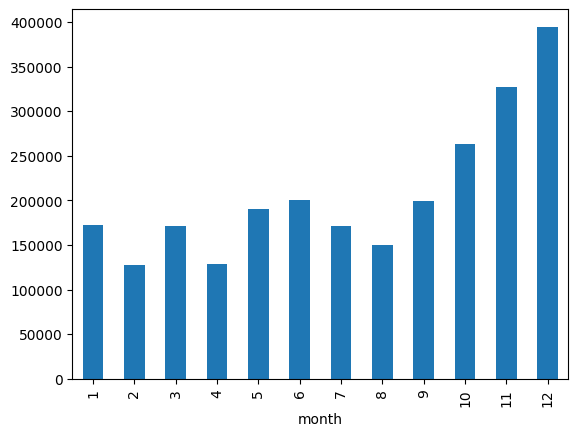

In [17]:
# Ventas por mes
ventas_mes = df.groupby('month')['UnitPrice'].sum()
ventas_mes.plot(kind='bar')
print(ventas_mes)

C:\Users\carlo\AppData\Local\Temp\ipykernel_11964\457868824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


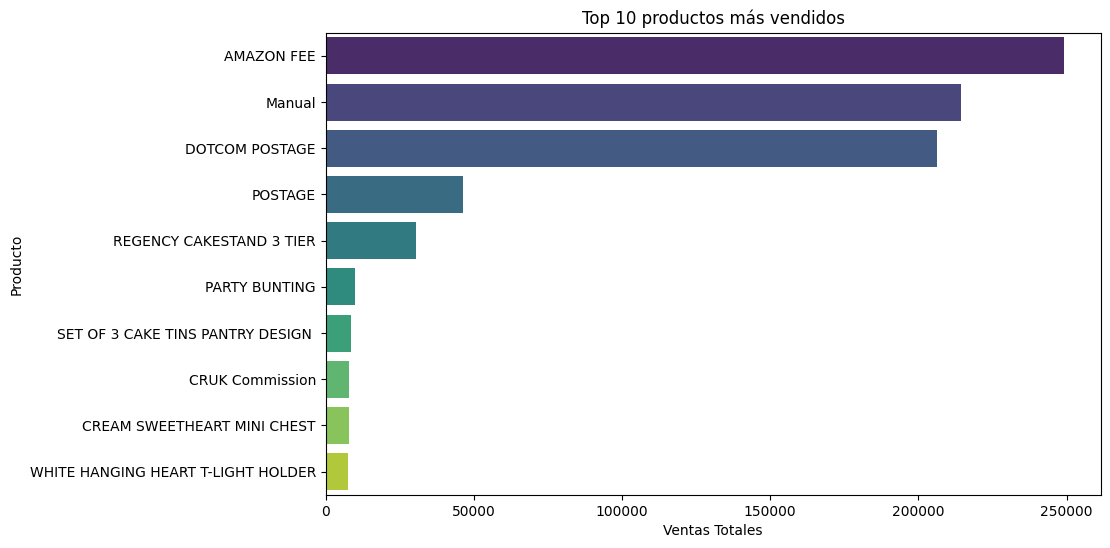

Description
AMAZON FEE                            249042.68
Manual                                214450.96
DOTCOM POSTAGE                        206252.06
POSTAGE                                46388.47
REGENCY CAKESTAND 3 TIER               30360.61
PARTY BUNTING                           9979.62
SET OF 3 CAKE TINS PANTRY DESIGN        8518.68
CRUK Commission                         7933.43
CREAM SWEETHEART MINI CHEST             7876.36
WHITE HANGING HEART T-LIGHT HOLDER      7590.87
Name: UnitPrice, dtype: float64


In [19]:
# Top 10 productos más vendidos
df.groupby('Description')['UnitPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products = df.groupby('Description')['UnitPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Ventas Totales')
plt.ylabel('Producto')
plt.show()
print(top_products)




In [21]:
# cliente mas frecuente
df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False).head(10)
print('Clientes más frecuentes:')
most_frequent_customers = df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending=False).head(10)
print(most_frequent_customers)


Clientes más frecuentes:
CustomerID
14096.0    41376.33
15098.0    40278.90
14911.0    31060.66
12744.0    25108.89
16029.0    24111.14
17841.0    20333.18
12748.0    15115.60
12536.0    13255.22
12757.0     8035.24
14606.0     7839.02
Name: UnitPrice, dtype: float64


In [26]:
with pd.ExcelWriter('analisis_ventas.xlsx') as writer:
    df.to_excel(writer, sheet_name='Datos Limpios', index=False)
    most_frequent_customers.to_excel(writer, sheet_name='Clientes Frecuentes')
    top_products.to_excel(writer, sheet_name='Top Productos')
    ventas_mes.to_excel(writer, sheet_name='Ventas Mensuales')
    pd.DataFrame({'Total Sales': [Total_sales]}).to_excel(writer, sheet_name='Total Ventas')

print("Análisis exportado a 'analisis_ventas.xlsx' exitosamente.")
#most_frequent_customers,top_products, ventas_mes, Total_sales

Análisis exportado a 'analisis_ventas.xlsx' exitosamente.


In [32]:

# Guardar gráficos como imágenes
import os

# Crear carpeta para guardar los gráficos
if not os.path.exists('graficos'):
    os.makedirs('graficos')

# Gráfico 1: Ventas por mes
plt.figure(figsize=(10,6))
ventas_mes.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales ($)')
plt.tight_layout()
plt.savefig('graficos/ventas_por_mes.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico de ventas por mes guardado")
plt.close()

# Gráfico 2: Top 10 productos
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Productos Más Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Producto')
plt.tight_layout()
plt.savefig('graficos/top_10_productos.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico de top 10 productos guardado")
plt.close()

# Gráfico 3: Clientes más frecuentes
plt.figure(figsize=(10,6))
most_frequent_customers.head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Clientes Más Frecuentes', fontsize=14, fontweight='bold')
plt.xlabel('Ventas Totales ($)')
plt.ylabel('Cliente ID')
plt.tight_layout()
plt.savefig('graficos/clientes_frecuentes.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico de clientes frecuentes guardado")
plt.close()


✓ Gráfico de ventas por mes guardado


C:\Users\carlo\AppData\Local\Temp\ipykernel_11964\1856655043.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


✓ Gráfico de top 10 productos guardado
✓ Gráfico de clientes frecuentes guardado


In [ ]:
# Crear documento PDF
pdf_filename = f'Analisis_Ventas_{datetime.now().strftime("%Y%m%d")}.pdf'
doc = SimpleDocTemplate(pdf_filename, pagesize=letter, topMargin=0.5*inch, bottomMargin=0.5*inch)

# Contenido del PDF
story = []
styles = getSampleStyleSheet()

# Título
title_style = ParagraphStyle(
    'CustomTitle',
    parent=styles['Heading1'],
    fontSize=24,
    textColor=colors.HexColor('#1f77b4'),
    spaceAfter=30,
    alignment=1
)

story.append(Paragraph("ANÁLISIS DE VENTAS", title_style))
story.append(Paragraph(f"Reporte generado: {datetime.now().strftime('%d de %B de %Y')}", styles['Normal']))
story.append(Spacer(1, 0.3*inch))

# Resumen de ventas
story.append(Paragraph("RESUMEN EJECUTIVO", styles['Heading2']))
summary_data = [
    ['Métrica', 'Valor'],
    ['Total de Ventas', f'${Total_sales:,.2f}'],
    ['Número de Transacciones', str(len(df))],
    ['Número de Clientes Únicos', str(df['CustomerID'].nunique())],
    ['Número de Productos Únicos', str(df['Description'].nunique())]
]

summary_table = Table(summary_data, colWidths=[3*inch, 2*inch])
summary_table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#1f77b4')),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 12),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
]))
story.append(summary_table)
story.append(Spacer(1, 0.3*inch))

# Agregar gráficos
story.append(PageBreak())
story.append(Paragraph("GRÁFICOS", styles['Heading2']))

story.append(Paragraph("Ventas por Mes", styles['Heading3']))
try:
    img1 = Image('graficos/ventas_por_mes.png', width=6*inch, height=3*inch)
    story.append(img1)
except:
    story.append(Paragraph("Gráfico no disponible", styles['Normal']))
story.append(Spacer(1, 0.2*inch))

story.append(Paragraph("Top 10 Productos Más Vendidos", styles['Heading3']))
try:
    img2 = Image('graficos/top_10_productos.png', width=6*inch, height=3*inch)
    story.append(img2)
except:
    story.append(Paragraph("Gráfico no disponible", styles['Normal']))
story.append(Spacer(1, 0.2*inch))

story.append(PageBreak())
story.append(Paragraph("Top 10 Clientes Más Frecuentes", styles['Heading3']))
try:
    img3 = Image('graficos/clientes_frecuentes.png', width=6*inch, height=3*inch)
    story.append(img3)
except:
    story.append(Paragraph("Gráfico no disponible", styles['Normal']))

# Construir PDF
doc.build(story)
print(f"✓ PDF '{pdf_filename}' generado exitosamente")


✓ PDF 'Analisis_Ventas_20260116.pdf' generado exitosamente
